<a href="https://colab.research.google.com/github/josepeon/python_dad_class/blob/main/pretrained_convnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.display import YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [2]:
from torchvision.datasets import FashionMNIST
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim
import torch

### Using `pytorch` to build convolutional network

![](https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif)

In [3]:
from IPython.display import Image

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 189kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.55MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 21.3MB/s]


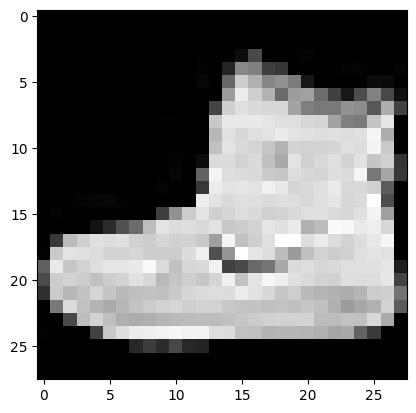

In [4]:
train = FashionMNIST('.', download = True)
plt.imshow(train[0][0], cmap = 'gray')

In [5]:
train = FashionMNIST('.', download = True, transform=ToTensor())
trainloader = DataLoader(train, batch_size = 32)

In [6]:
train[0][0].shape

torch.Size([1, 28, 28])

In [7]:
conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding = 1)

In [8]:
output = conv1(train[0][0].unsqueeze(0))

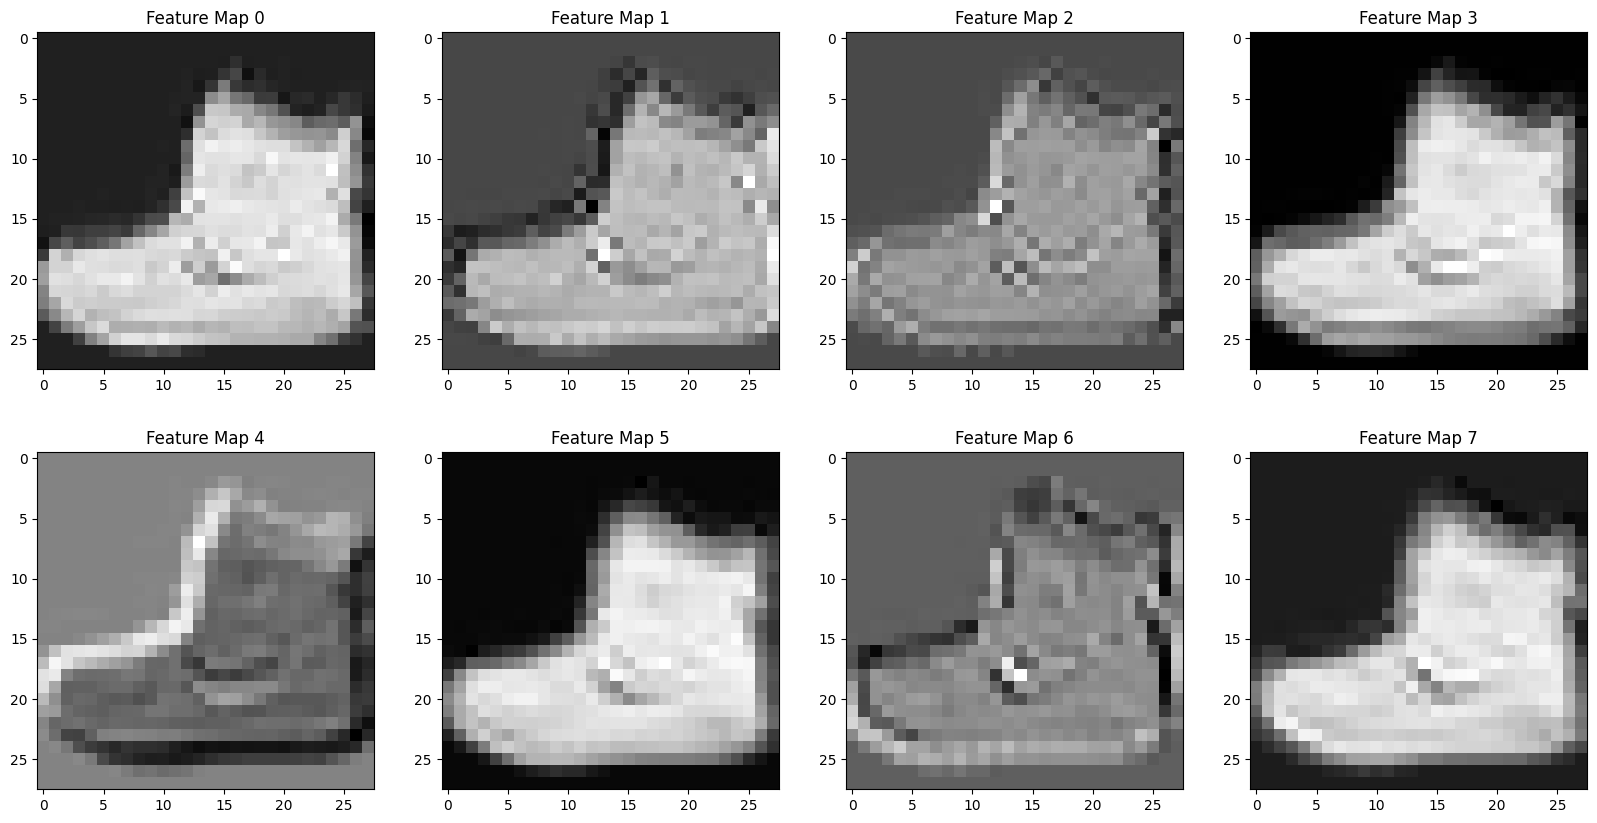

In [9]:
fig, ax = plt.subplots(2, 4, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(4):
    ax[i, j].imshow(output[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [10]:
pool = nn.MaxPool2d(2)

In [11]:
output_pool = pool(output)

In [12]:
output_pool[0].shape

torch.Size([8, 14, 14])

In [13]:
conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, padding = 1)

In [14]:
output_conv2 = conv2(output_pool)


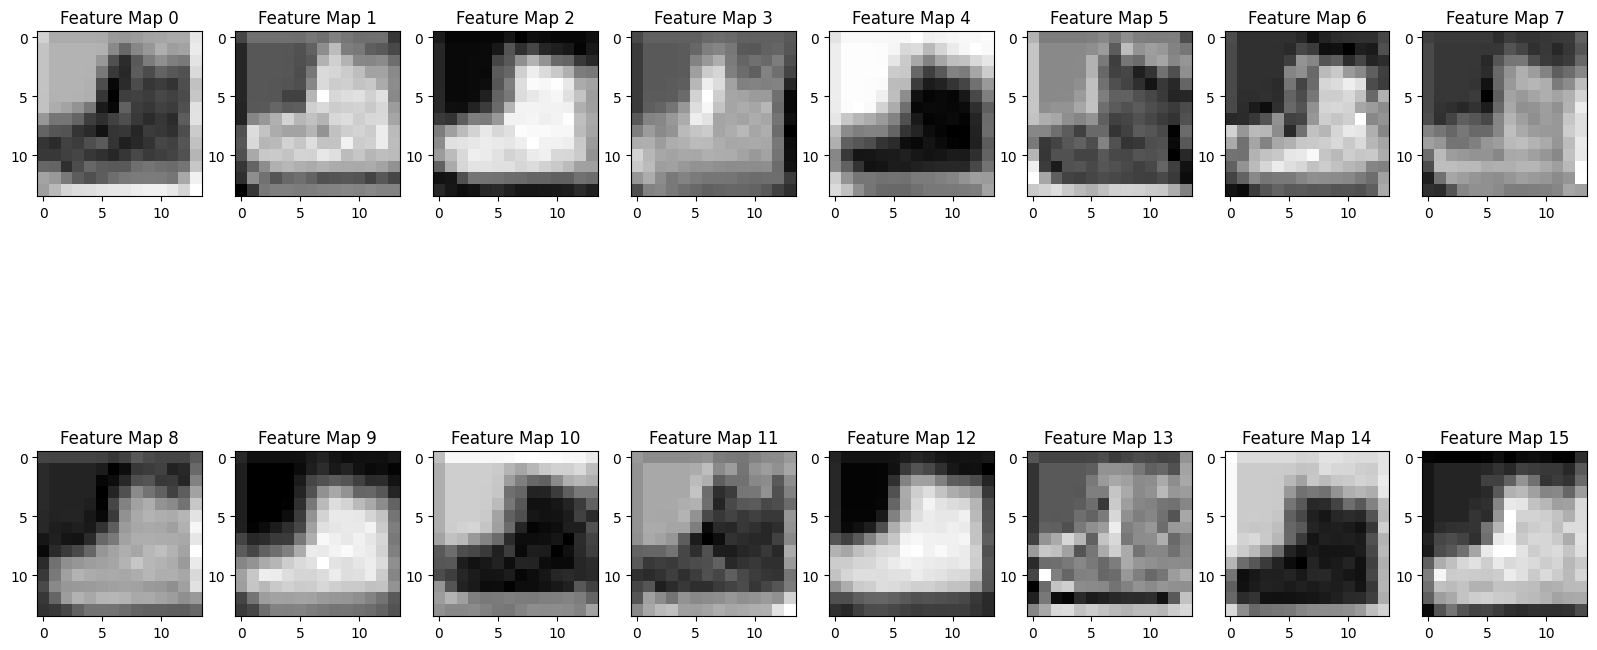

In [15]:
fig, ax = plt.subplots(2, 8, figsize = (20, 10))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(output_conv2[0][counter].detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1

In [16]:
flattener = nn.Flatten()

In [17]:
flattener(output_conv2)

tensor([[-0.1488, -0.2229, -0.2229,  ...,  0.1360,  0.1400,  0.1951]],
       grad_fn=<ViewBackward0>)

In [18]:
flattener(pool(output_conv2)).shape

torch.Size([1, 784])

In [19]:
16*7*7

784

In [20]:
linear1 = nn.Linear(in_features=16*7*7, out_features=128)
linear2 = nn.Linear(in_features = 128, out_features = 10)
conv_activation = nn.Tanh()
linear_activation = nn.ReLU()

In [21]:
model = nn.Sequential(conv1, conv_activation, pool,
                      conv2, conv_activation, pool,
                      flattener,
                      linear1, linear_activation,
                      linear2)

In [22]:
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [23]:
loss_fn = nn.CrossEntropyLoss()

In [24]:
from tqdm import tqdm

In [25]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

In [26]:
losses = []
for epoch in tqdm(range(20)):
  for X, y in trainloader:
    X, y = X.to(device), y.to(device)
    yhat = model(X)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  losses.append(loss.item())
  print(f'Epoch {epoch} Loss: {loss.item()}')

  5%|▌         | 1/20 [00:10<03:20, 10.57s/it]

Epoch 0 Loss: 0.6964340806007385


 10%|█         | 2/20 [00:20<02:58,  9.93s/it]

Epoch 1 Loss: 0.565293550491333


 15%|█▌        | 3/20 [00:29<02:44,  9.68s/it]

Epoch 2 Loss: 0.4839436709880829


 20%|██        | 4/20 [00:38<02:32,  9.56s/it]

Epoch 3 Loss: 0.412852942943573


 25%|██▌       | 5/20 [00:48<02:22,  9.49s/it]

Epoch 4 Loss: 0.35596156120300293


 30%|███       | 6/20 [00:57<02:12,  9.47s/it]

Epoch 5 Loss: 0.3188666105270386


 35%|███▌      | 7/20 [01:07<02:03,  9.49s/it]

Epoch 6 Loss: 0.29230764508247375


 40%|████      | 8/20 [01:16<01:54,  9.52s/it]

Epoch 7 Loss: 0.2713611423969269


 45%|████▌     | 9/20 [01:26<01:44,  9.51s/it]

Epoch 8 Loss: 0.2551247179508209


 50%|█████     | 10/20 [01:35<01:34,  9.47s/it]

Epoch 9 Loss: 0.24578051269054413


 55%|█████▌    | 11/20 [01:44<01:24,  9.44s/it]

Epoch 10 Loss: 0.24106013774871826


 60%|██████    | 12/20 [01:54<01:15,  9.45s/it]

Epoch 11 Loss: 0.23240527510643005


 65%|██████▌   | 13/20 [02:03<01:06,  9.44s/it]

Epoch 12 Loss: 0.22640632092952728


 70%|███████   | 14/20 [02:13<00:56,  9.41s/it]

Epoch 13 Loss: 0.22056619822978973


 75%|███████▌  | 15/20 [02:22<00:47,  9.40s/it]

Epoch 14 Loss: 0.21553686261177063


 80%|████████  | 16/20 [02:31<00:37,  9.36s/it]

Epoch 15 Loss: 0.21026861667633057


 85%|████████▌ | 17/20 [02:41<00:28,  9.38s/it]

Epoch 16 Loss: 0.20732513070106506


 90%|█████████ | 18/20 [02:50<00:18,  9.39s/it]

Epoch 17 Loss: 0.20562230050563812


 95%|█████████▌| 19/20 [03:00<00:09,  9.38s/it]

Epoch 18 Loss: 0.1999492347240448


100%|██████████| 20/20 [03:09<00:00,  9.47s/it]

Epoch 19 Loss: 0.19403307139873505


In [27]:
model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Tanh()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): Tanh()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=784, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=10, bias=True)
)

Exploring what the network is paying attention to by visualizing the results of the convolutions after being trained for 20 epochs.  

In [28]:
x = train[0][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)


Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


In [29]:
x.shape

torch.Size([16, 7, 7])

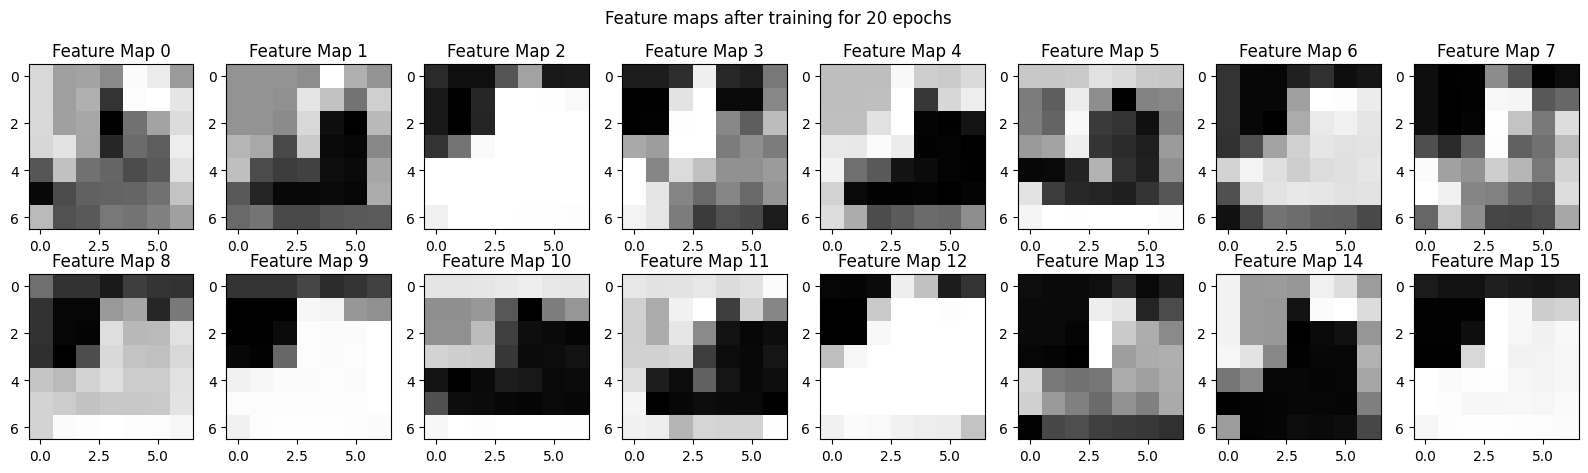

In [30]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [31]:
x = train[1][0].to(device)
for layer in model:
  print(layer)
  if isinstance(layer, nn.Flatten):
    break
  x = layer(x)

Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Tanh()
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
Flatten(start_dim=1, end_dim=-1)


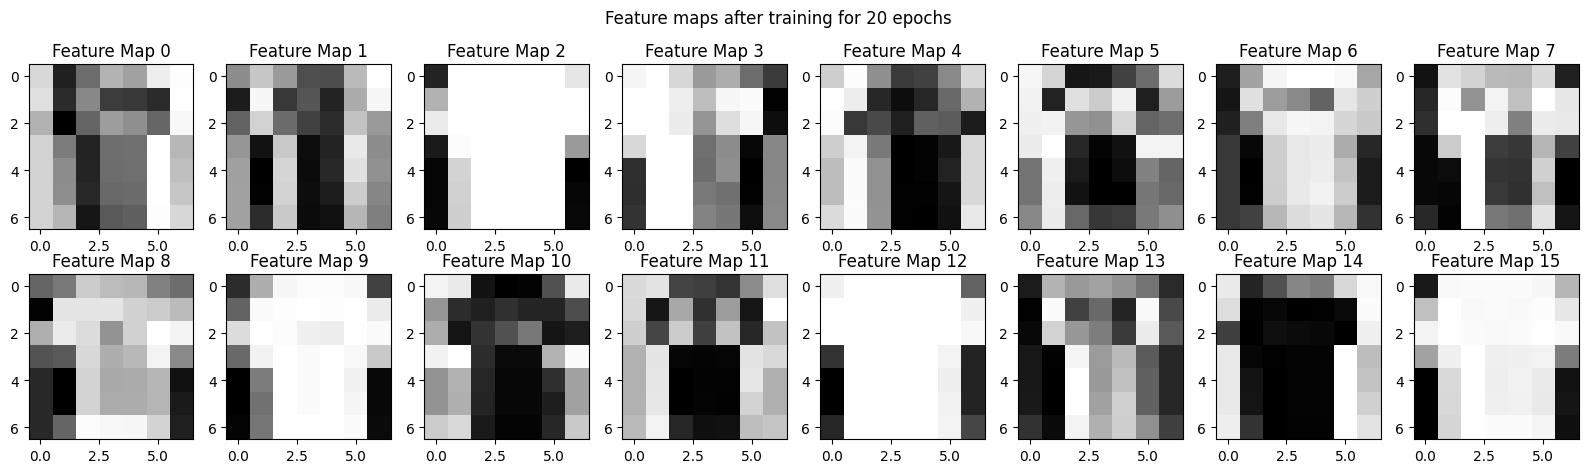

In [32]:
fig, ax = plt.subplots(2, 8, figsize = (20, 5))
counter = 0
for i in range(2):
  for j in range(8):
    ax[i, j].imshow(x[counter].cpu().detach().numpy(), cmap = 'gray')
    ax[i,j].set_title(f'Feature Map {counter}')
    counter += 1
fig.suptitle('Feature maps after training for 20 epochs');

In [33]:
correct = 0
total = 0
for x, y in trainloader:
  x, y = x.to(device), y.to(device)
  yhat = model(x)
  correct += (torch.argmax(yhat, dim = 1) == y).sum()
  total += len(y)

In [34]:
correct/total

tensor(0.9127, device='cuda:0')

In [35]:
torch.save(model, 'fashionmodel.pt')

**PROBLEM 2**

Below, a dataset containing 10 images of

In [36]:
from torchvision.datasets import CIFAR10

In [37]:
train = CIFAR10(root = '.', download = True, transform=ToTensor())

100%|██████████| 170M/170M [00:15<00:00, 11.4MB/s]


In [38]:
train[0][0]

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

In [39]:
from torchvision.utils import make_grid

In [40]:
grid = make_grid([train[i][0] for i in range(16)], nrow=4)

In [41]:
import torchvision.transforms.functional as F


plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

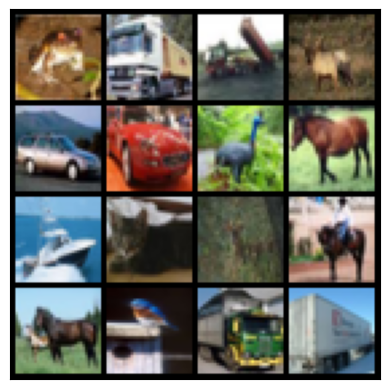

In [42]:
show(grid)

In [43]:
train[0][0].shape

torch.Size([3, 32, 32])

In [44]:
from torchvision.models import resnet50, ResNet50_Weights

In [45]:
#loading in the prebuilt model weights
weights = ResNet50_Weights.DEFAULT
#loads in the transformations to the images that need
#to happen before the image goes into the network
transforms = weights.transforms()

In [46]:
#load model and weights
model = resnet50(weights = weights)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 161MB/s]


In [47]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [48]:
#changing the output of model to reflect my task
#(classify 10 images)
model.fc = nn.Linear(in_features=2048, out_features=10)

In [49]:
trainloader = DataLoader(train, batch_size = 32)

In [50]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [51]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [52]:
from tqdm import tqdm

In [53]:
model = model.to(device)
for epoch in tqdm(range(5)):
  for x,y in trainloader:
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss: {loss.item()}')

 20%|██        | 1/5 [01:01<04:05, 61.37s/it]

Epoch 0 Loss: 0.35199299454689026


 40%|████      | 2/5 [02:01<03:02, 60.91s/it]

Epoch 1 Loss: 0.03851819038391113


 60%|██████    | 3/5 [03:02<02:01, 60.83s/it]

Epoch 2 Loss: 0.012700188905000687


 80%|████████  | 4/5 [04:03<01:00, 60.81s/it]

Epoch 3 Loss: 0.006211808416992426


100%|██████████| 5/5 [05:04<00:00, 60.81s/it]

Epoch 4 Loss: 0.0030628335662186146


In [54]:
correct = 0
total = 0
model = model.to(device)
for x,y in trainloader:
    x,y = x.to(device), y.to(device)
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [55]:
correct/total

tensor(0.9999, device='cuda:0')

In [56]:
torch.save(model, 'cifarmodel.pt')

In [57]:
weights = ResNet50_Weights.DEFAULT #pretrained weights
transforms = weights.transforms() #transforms to get your pictures in right format
model = resnet50(weights = weights) #model with pretrained weights

In [58]:
model.fc = nn.Linear(2048, 2)

In [59]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from tqdm import tqdm

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [67]:
path = 'drive/MyDrive/small/train/'

In [68]:
train = ImageFolder(path, transform=transforms)
val = ImageFolder('drive/MyDrive/small/val/', transform = transforms)

In [69]:
trainloader = DataLoader(train, batch_size = 32)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [70]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [71]:
transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [72]:
model = model.to(device)
for epoch in tqdm(range(20)):
  for x,y in trainloader:
    #x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    loss = loss_fn(yhat, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  print(f'Epoch {epoch} Loss: {loss.item()}')

  0%|          | 0/20 [08:18<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
torch.save(model, 'catdog.pt')

In [ ]:
correct = 0
total = 0
model = model.to(device)
for x,y in trainloader:
    x,y = x.to(device), y.to(device)
    x = transforms(x)
    x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [ ]:
correct/total

In [ ]:
valloader = DataLoader(val, batch_size=32)

In [ ]:
correct = 0
total = 0
model = model.to(device)
model.eval()
for x,y in tqdm(valloader):
    x,y = x.to(device), y.to(device)
    #x = transforms(x)
    #x, y = x.to(device), y.to(device)
    yhat = model(x)
    correct += (torch.argmax(yhat, dim = 1) == y).sum()
    total += len(y)

In [ ]:
correct/total

### Example with Mobilenet V3

In [ ]:
from torchvision.models import MobileNet_V3_Small_Weights, mobilenetv3

In [ ]:
weights = MobileNet_V3_Small_Weights.DEFAULT
transforms = weights.transforms()

In [ ]:
model = mobilenetv3.mobilenet_v3_small(weights = weights)

In [ ]:
model

In [ ]:
from torchvision.io import read_image

In [ ]:
cat = read_image('catpic.png')

In [ ]:
cat

In [ ]:
cat.shape

In [ ]:
x = transforms(cat[:-1, :, :])

In [ ]:
x.unsqueeze(0).shape

In [ ]:
output = model(x.unsqueeze(0))

In [ ]:
import torch

In [ ]:
torch.argmax(output, dim = 1)

In [ ]:
from IPython.display import Image

In [ ]:
Image('catpic.png')

In [ ]:
weights.meta['categories'][87]